# SENTIMENT ANALYSIS USING TextBlob & Nltk 

In [5]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [6]:
text1 = "the meal prepared was very good"
blob1 = TextBlob(text1)

In [7]:
blob1.sentiment

Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)

In [8]:
text2 = "the flight was horrible and filled with turbulence"
blob2 = TextBlob(text2)
blob2.sentiment

Sentiment(polarity=-0.3, subjectivity=0.95)

In [9]:
text3 = "The earth revolves around the sun"
blob3 = TextBlob(text3)
blob3.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
## polarity indicates the how positive or negative the comment is
## value of polarity ranges from -1 to 1 ( -ve : Comment is not good)
##                                       ( +ve : Comment is good)

In [ ]:
# value of subjectivity relates to whether it is a public opinion or a factual 
# information ( range : 0 to 1)

In [10]:
from textblob import TextBlob
amazon = pd.read_csv(r"C:\Users\KIIT\Dropbox\My PC (BT1000100795)\Downloads\amazonreviews.tsv" , sep = '\t')

In [11]:
amazon.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [12]:
amazon.shape

(10000, 2)

In [13]:
amazon.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [14]:
polarity_score = []

for i in range(0, amazon.shape[0] ):
    score = TextBlob(amazon.iloc[i][1])
    score1 = score.sentiment[0]
    polarity_score.append(score1)

In [15]:
amazon = pd.concat([amazon, pd.Series(polarity_score)] , axis=1 )
## to the polarity_score column to the original DataFrame

In [16]:
amazon.head()

,label,review,0
0,pos,Stuning even for the non-gamer: This sound tra...,-0.021875
1,pos,The best soundtrack ever to anything.: I'm rea...,0.261111
2,pos,Amazing!: This soundtrack is my favorite music...,0.274691
3,pos,Excellent Soundtrack: I truly like this soundt...,0.272727
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.324802


In [17]:
amazon.rename(columns={amazon.columns[2] :"Sentiment"}, inplace = True)

In [18]:
amazon.head()

,label,review,Sentiment
0,pos,Stuning even for the non-gamer: This sound tra...,-0.021875
1,pos,The best soundtrack ever to anything.: I'm rea...,0.261111
2,pos,Amazing!: This soundtrack is my favorite music...,0.274691
3,pos,Excellent Soundtrack: I truly like this soundt...,0.272727
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.324802


In [19]:
len(amazon[amazon.Sentiment > 0])

7411

In [20]:
amazon.head(30)

,label,review,Sentiment
0,pos,Stuning even for the non-gamer: This sound tra...,-0.021875
1,pos,The best soundtrack ever to anything.: I'm rea...,0.261111
2,pos,Amazing!: This soundtrack is my favorite music...,0.274691
3,pos,Excellent Soundtrack: I truly like this soundt...,0.272727
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.324802
5,pos,an absolute masterpiece: I am quite sure any o...,0.296599
6,neg,"Buyer beware: This is a self-published book, a...",0.042708
7,pos,Glorious story: I loved Whisper of the wicked ...,0.503333
8,pos,A FIVE STAR BOOK: I just finished reading Whis...,0.075000
9,pos,Whispers of the Wicked Saints: This was a easy...,0.216667


In [21]:
len(amazon[amazon.Sentiment > 0])

7411

In [22]:
len(amazon[amazon.Sentiment < 0])

2428

In [23]:
len(amazon[amazon.Sentiment > .1])

5825

In [24]:
from wordcloud import WordCloud
WordCloud

wordcloud.wordcloud.WordCloud

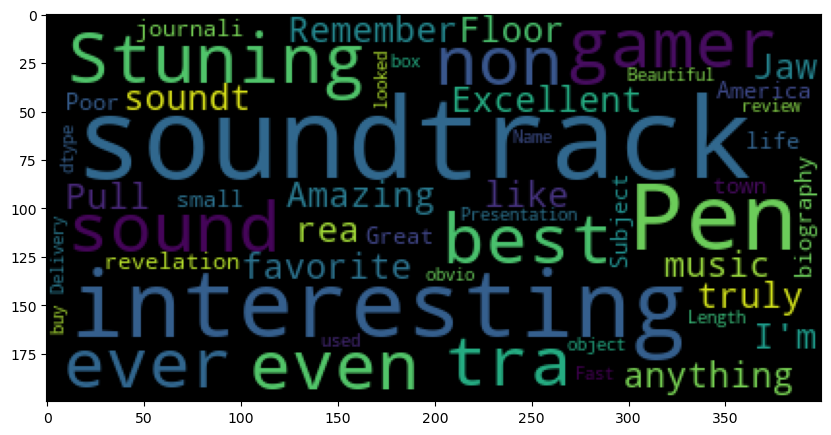

In [25]:
cloud = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(amazon['review']) )
plt.figure(figsize= (10 , 10))
plt.imshow(cloud)

In [26]:
amazon_positive= amazon[amazon.label == 'pos']
amazon_positive.shape

(4903, 3)

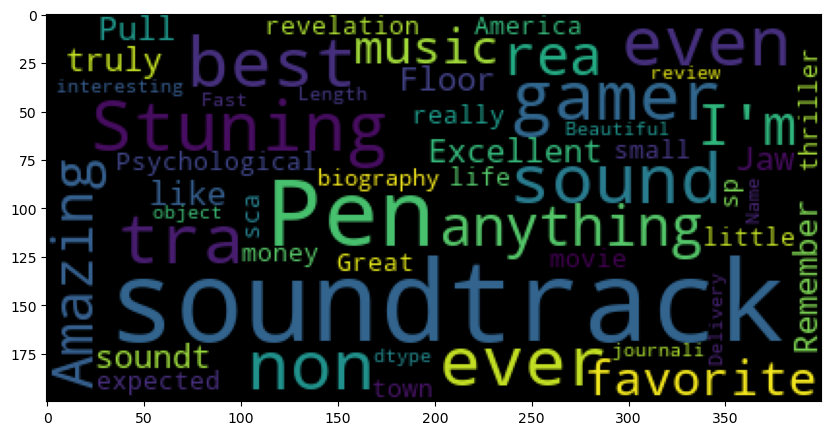

In [27]:
cloud = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(amazon_positive['review']) )
plt.figure(figsize= (10 , 10))
plt.imshow(cloud)

In [28]:
amazon_negative = amazon[amazon.label == 'neg']
amazon_negative.shape

(5097, 3)

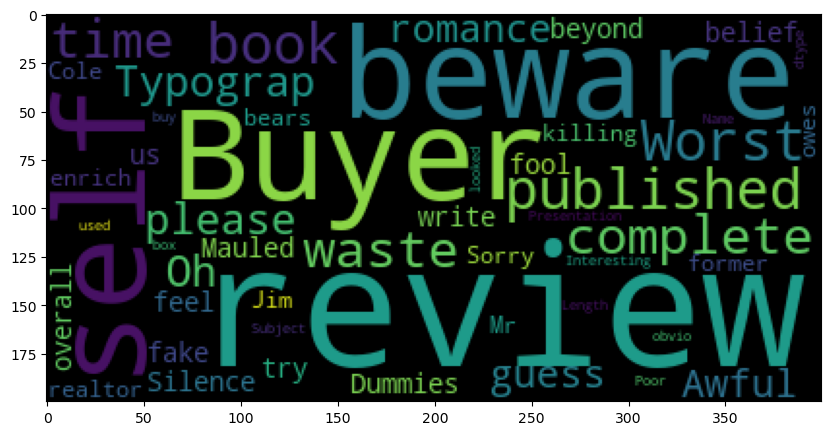

In [29]:
cloud = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(amazon_negative['review']) )
plt.figure(figsize= (10 , 10))
plt.imshow(cloud)